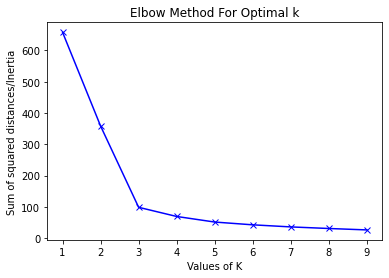

/Users/awais/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/awais/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0, flags=flags)


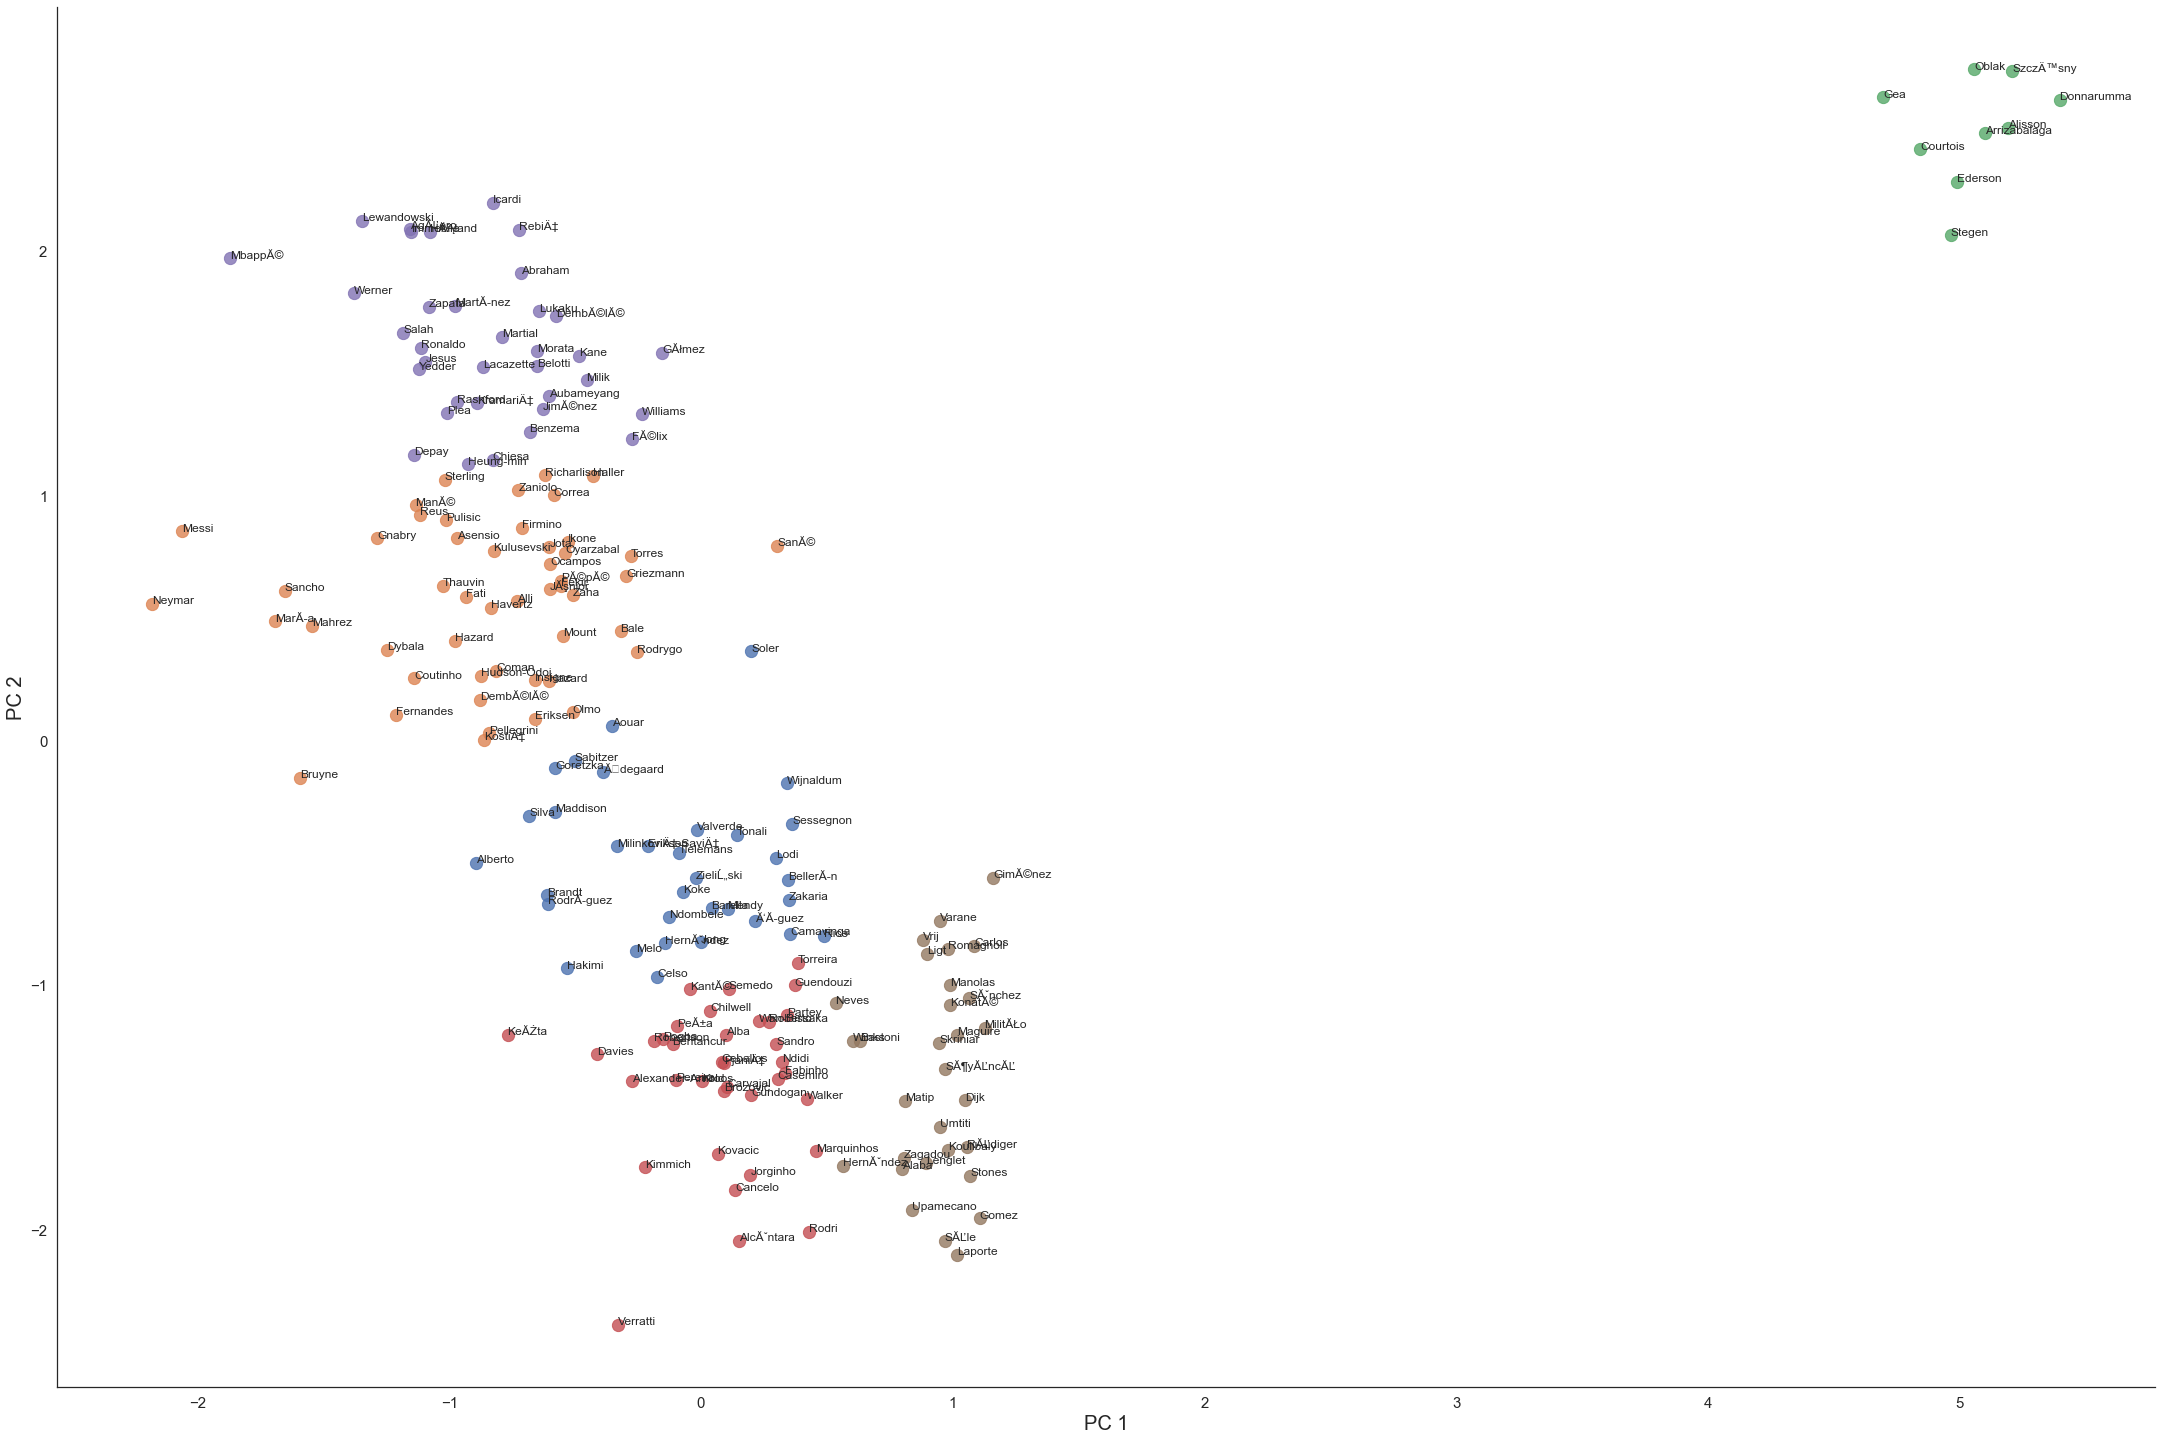

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA

#selecting relevant features

#features = ["player", "age", "value", "height", "minutes", "goals", "assists", "xg", "xa", "shots_total", "shots_on_target", "pens_won", "passes_completed", "passes", "passes_into_final_third", "passes_into_penalty_area", "crosses_into_penalty_area", "progressive_passes", "through_balls", "sca_per90", "gca_per90", "tackles", "tackles_won", "dribble_tackles_pct", "pressures", "pressure_regains", "pressure_regain_pct", "blocks", "touches", "interceptions", "dribbles_completed", "dribbles", "dribbles_completed_pct", "carries", "carry_distance", "miscontrols", "ball_recoveries", "aerials_won", "aerials_lost"]
df = data

df = df[df.value > 30000000]

#storing names and dataframe for k-means to plot later
player_names = df.player.tolist()

df
#corrmat = df.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
#g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#scaling and normalising the data


scaler = preprocessing.MinMaxScaler()

df_norm = scaler.fit_transform(df.values)

pca = PCA(n_components = 2) # 2D PCA for the plot
reduced_df = pd.DataFrame(pca.fit_transform(df_norm))



#chosing the number of clusters
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(reduced_df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

#actual algorithm

# specify the number of clusters
kmeans = KMeans(n_clusters=6)

# fit the input data
kmeans = kmeans.fit(reduced_df)

# get the cluster labels
labels = kmeans.predict(reduced_df)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

reduced_df['cluster'] = clusters

#just using last names to make the scatter plot less cluttered
player_names = [item.split()[-1] for item in player_names]

reduced_df['name'] = player_names
reduced_df.columns = ['x', 'y', 'cluster', 'name']
reduced_df.head()

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced_df, legend=False,
                   fit_reg=False, height = 20, aspect = 1.5, scatter_kws={"s": 150})

texts = []
for x, y, s in zip(reduced_df.x, reduced_df.y, reduced_df.name):
    texts.append(plt.text(x, y, s))

#ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

